In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style('darkgrid')
np.random.seed(1)


from sklearn.metrics import plot_confusion_matrix, roc_curve, precision_recall_curve 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Understanding the problem
### there are two answers in this project that we need to provide
- 1st is to identify the reasons customers are leaving voluntarily
- 2nd is to create a machine learing model the would predict the probability that customers would churn 

In [2]:
# load the data set

cdf = pd.read_csv('../data/customer.csv')

In [3]:
cdf.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
cdf.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
cdf.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### there are no missing numbers.

## Drop duplicate rows

In [7]:
cdf = cdf.drop_duplicates()

## Checking the distrubution of values in each columns

In [8]:
for x in cdf.columns:
    print(cdf[x].value_counts())
    print('\n')

9812-GHVRI    1
8701-DGLVH    1
7013-PSXHK    1
6298-QDFNH    1
2609-IAICY    1
2251-PYLPB    1
4012-ZTHBR    1
7169-YWAMK    1
9518-IMLHK    1
1696-HXOWK    1
5406-KGRMX    1
9445-ZUEQE    1
5311-IHLEI    1
6135-OZQVA    1
9885-AIBVB    1
1035-IPQPU    1
3612-YVGSJ    1
8213-TAZPM    1
6034-ZRYCV    1
9850-OWRHQ    1
3018-TFTSU    1
6486-LHTMA    1
3865-ZYKAD    1
8205-VSLRB    1
3352-ALMCK    1
0247-SLUJI    1
7326-RIGQZ    1
5619-PTMIK    1
0599-XNYDO    1
9715-SBVSU    1
             ..
5084-OOVCJ    1
4913-EHYUI    1
4750-UKWJK    1
8259-NFJTV    1
4236-UJPWO    1
0854-UYHZD    1
8039-ACLPL    1
7330-WZLNC    1
4927-WWOOZ    1
3752-CQSJI    1
3259-KNMRR    1
1891-QRQSA    1
0022-TCJCI    1
4816-JBHOV    1
8008-HAWED    1
4967-WPNCF    1
7861-UVUFT    1
3721-CNZHX    1
9609-BENEA    1
0378-NHQXU    1
8917-FAEMR    1
3249-ZPQRG    1
8823-RLPWL    1
7325-ENZFI    1
3071-MVJCD    1
4813-HQMGZ    1
7110-BDTWG    1
4280-DLSHD    1
8217-QYOHV    1
2351-RRBUE    1
Name: customerID, Length

In [9]:
# first we have to convert columns with just yes and no to Zeros and ones

def tonumber(x):
    if x == 'No':
        return 0
    else:
        return 1

a = ['Partner', 'PhoneService', 'Dependents', 'PaperlessBilling', 'Churn']

for x in a:
    cdf[x] = cdf[x].apply(tonumber)
    

In [10]:
# for the gender column
cdf['gender'] = cdf['gender'].apply(lambda x: 1 if x =='Male' else 0)

In [11]:
# droping the customerID column as it is not needed

cdf = cdf.drop('customerID', axis=1)

In [12]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(8), object(11)
memory usage: 1.1+ MB


In [13]:
# There are empty strings in the total charges column
# the approach am using is to write a python script to see the indexes they occur in and then work on them

cdf[cdf['TotalCharges']==' ']['TotalCharges'].index
checkers = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for x in checkers:
    cdf.iloc[x, -2] = -99999


In [14]:
# Now we can convert the total charges column from strings to float
cdf['TotalCharges'] = cdf['TotalCharges'].astype(dtype='float64')
cdf['TotalCharges'][0]

29.85

In [15]:
cdf.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
# Next up is to covert the other categorical columns using pandas dummy variable and drop the first column

cdf = pd.get_dummies(cdf, drop_first=True)

cdf.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0                                0                0   
2                0                                0                0   
3                1                                0                0   
4                0                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

## Find out how many clusters our data possesses with KMeans and TSNE

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = StandardScaler().fit_transform(cdf.drop('Churn', axis=1).copy())

([<matplotlib.axis.XTick at 0x20901996288>,
 <a list of 29 Text major ticklabel objects>)

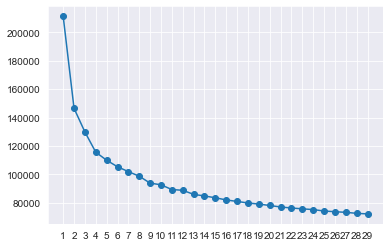

In [165]:
check = range(1,30)
inertia = []

for x in check:
    km = KMeans(n_clusters=x)
    km.fit(data)
    inertia.append(km.inertia_)
    
plt.plot(check, inertia, '-o')
plt.xticks(check)

In [45]:
kmean = KMeans(n_clusters=4)

cus = kmean.fit_predict(data)

dat = pd.DataFrame({'label': cus, 'real':cdf['Churn']})


print(pd.crosstab(dat['label'], dat['real']))

real      0     1
label            
0      1828   320
1      1413   113
2      1421  1266
3       512   170


In [46]:
cdf['Kmeans'] = cus

# Extracting X and Y

In [47]:
X = cdf.drop('Churn', axis=1).copy()
y = cdf['Churn'].copy()

## TSNE Visualization

In [36]:
from sklearn.manifold import TSNE

mode = TSNE(learning_rate=200)

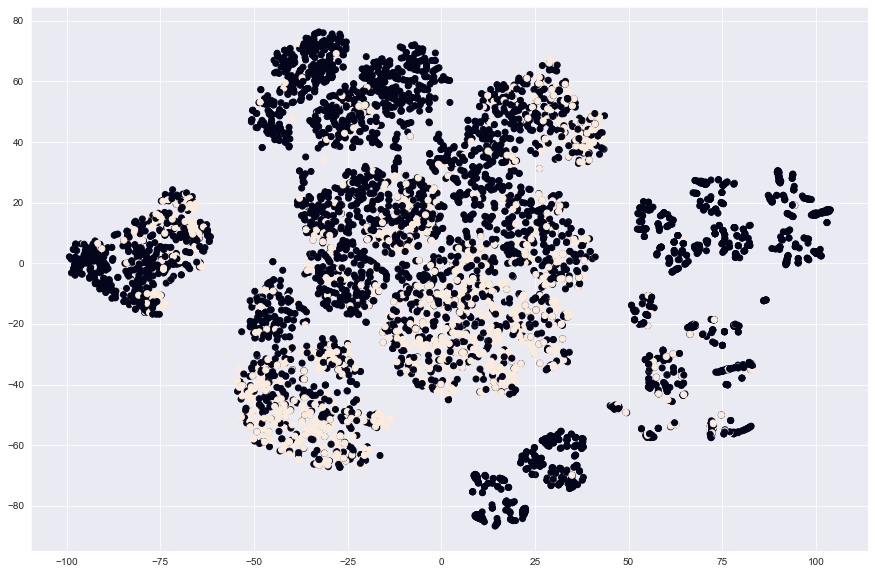

In [40]:
node = mode.fit_transform(data)

xs = node[:, 0]
ys = node[:, 1]

plt.figure(figsize=(15,10))
plt.scatter(xs, ys, c=y)

#### We have an Imbalanced Binary Classification problem on our hands.

# Solving the first question

### Finding out the number of people who churn

In [48]:
print(y.value_counts())


0    5174
1    1869
Name: Churn, dtype: int64


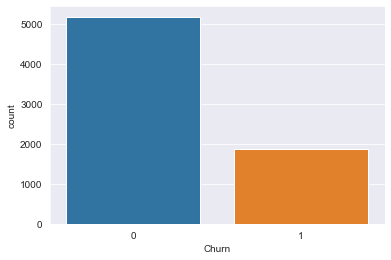

In [49]:
# count plot of the churn

sns.countplot(x= 'Churn', data=cdf)

#### churn yes means people who switched while churn no means people who didnt switch 
#### from the diagram above, the dataset tells us that most people do not switch tello companies.
#### we have to focus on the people who churned vontarily for the first question (churn = 1)

# Finding out the reasons Customers defected through Exploratory Data Analysis

In [50]:
X.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  \
0                 1           29.85         29.85   
1                 0           56.95       1889.50   
2                 1           53.85        108.15   
3                 0           42.30       1840.75   
4                 1           70.70        151.65   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                               1  ...                                0   
1                               0  ...                                0   
2                               0  ...                                0   
3                               1  ...                                0   
4                               0  ...                                0   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0                0                                    0                    0   
1                0                                    0                    0   
2                0                                    0                    0   
3                0                                    0                    0   
4                0                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Kmeans  
0                           0       3  
1                           1       2  
2                           1       2  
3                           0       3  
4                           0       2  

[5 rows x 31 columns]

In [51]:
X.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7043.000000       7043.000000     7043.000000   7043.000000   
mean       0.903166          0.592219       64.761692   2123.552421   
std        0.295752          0.491457       30.090047   4631.027787   
min        0.000000          0.000000       18.250000 -99999.000000   
25%        1.000000          0.000000       35.500000    398.550000   
50%        1.000000          1.000000       70.350000   1394.550000   
75%        1.000000          1.000000       89.850000   3786.600000   
max        1.000000          1.000000      118.750000   8684.800000   

       MultipleLines_No phone service  ...  StreamingTV_No internet service  \
count                     7043.000000  ...                      7043.000000   
mean                         0.096834  ...                         0.216669   
std                          0.295752  ...                         0.412004   
min                          0.000000  ...                         0.000000   
25%                          0.000000  ...                         0.000000   
50%                          0.000000  ...                         0.000000   
75%                          0.000000  ...                         0.000000   
max                          1.000000  ...                         1.000000   

       StreamingTV_Yes  StreamingMovies_No internet service  \
count      7043.000000                          7043.000000   
mean          0.384353                             0.216669   
std           0.486477                             0.412004   
min           0.000000                             0.000000   
25%           0.000000                             0.000000   
50%           0.000000                             0.000000   
75%           1.000000                             0.000000   
max           1.000000                             1.000000   

       StreamingMovies_Yes  Contract_One year  Contract_Two year  \
count          7043.000000        7043.000000        7043.000000   
mean              0.387903           0.209144           0.240664   
std               0.487307           0.406726           0.427517   
min               0.000000           0.000000           0.000000   
25%               0.000000           0.000000           0.000000   
50%               0.000000           0.000000           0.000000   
75%               1.000000           0.000000           0.000000   
max               1.000000           1.000000           1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       PaymentMethod_Mailed check       Kmeans  
count                 70

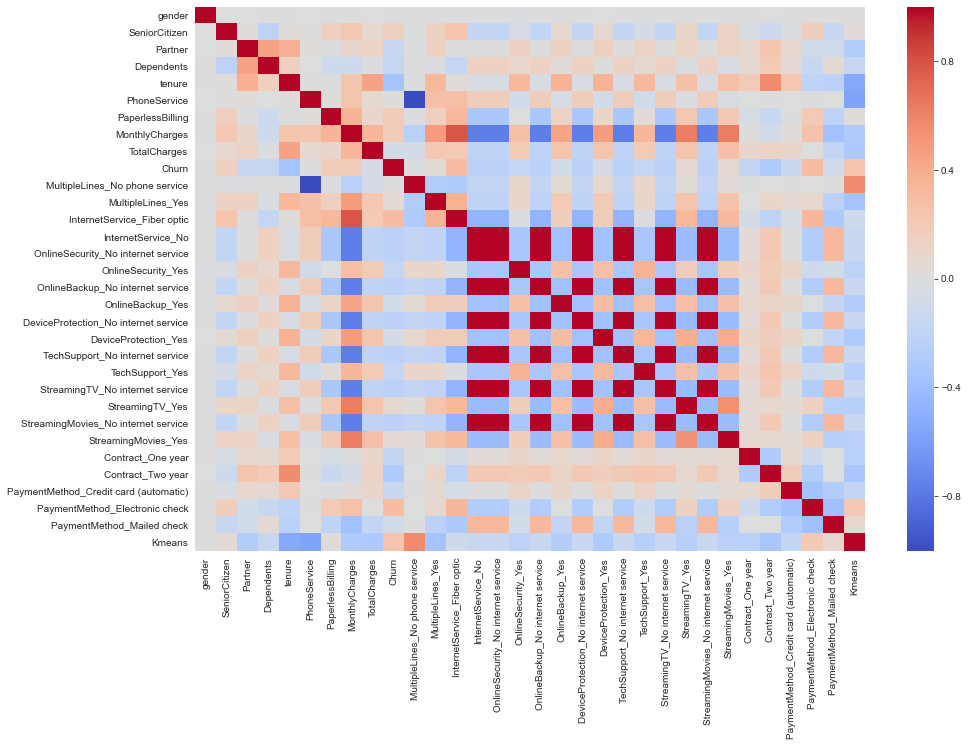

In [52]:
# plotting a heatmap to check for multi colinearity
plt.figure(figsize=(15,10))
sns.heatmap(cdf.corr(), cmap='coolwarm')

### From the heatmap above we can conclusively see that there are some features that very little effect on whether or not a customer churns. We would drop those feature because they contribute to noise.

([<matplotlib.axis.XTick at 0x1cfeafecd08>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

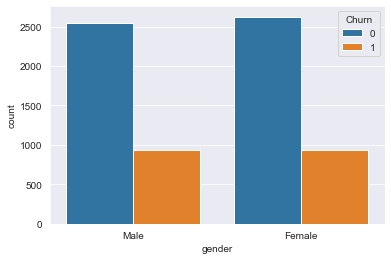

In [53]:
plt.figure()
sns.countplot(x='gender', data=cdf, hue='Churn')
plt.xticks([0,1], labels=['Male', 'Female'])

In [54]:
cdf['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The features that has a high influence on wether or not a customer would churn include
- whether or not they are senior citizens
- do not Stream tv
- do not Stream movies
- paperless Billing
- Monthly charges
- type of payment method
- tenure
- the type of internet service they use
- if they do not have online security, or back up or tech support

The last 4 reasons have to do with why the customers are leaving voluntarily. we can recommend to the company that
- They should increase the quality and speed of their services most likely advertized or promote fiber 
- the should look at reducing their rates
- they should make non paperless billings more attractive to their customers.
- they should pin the changes being made in these areas to their advert.

In [55]:
combined = cdf.copy()
combined.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   
5       0              0        0           0       8             1   
6       1              0        0           1      22             1   
7       0              0        0           0      10             0   
8       0              0        1           0      28             1   
9       1              0        0           1      62             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   
5                 1           99.65        820.50      1  ...   
6                 1           89.10       1949.40      0  ...   
7                 0           29.75        301.90      0  ...   
8                 1          104.80       3046.05      1  ...   
9                 0           56.15       3487.95      0  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   
5                                0                1   
6                                0                1   
7                                0                0   
8                                0                1   
9                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   
5                                    0                    1   
6                                    0                    0   
7                                    0                    0   
8                                    0                    1   
9                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   
5                  0                  0   
6                  0                  0   
7                  0                  0   
8                  0                  0   
9                  1                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   
5                                      0                               1   
6                                      1                               0   
7                                      0                               0   
8                                      0       

In [56]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
gender                                   7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
Churn                                    7043 non-null int64
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service 

# Feature Selection

In [57]:
# Based on our heatmap results we can carry feature selection based on relationship with the churn decision 

pd.DataFrame(combined.corr()['Churn']).apply(lambda x: np.abs(x)).sort_values(by='Churn')

Churn
gender                                 0.008612
PhoneService                           0.011942
MultipleLines_No phone service         0.011942
MultipleLines_Yes                      0.040102
StreamingMovies_Yes                    0.061382
StreamingTV_Yes                        0.063228
DeviceProtection_Yes                   0.066160
TotalCharges                           0.076805
OnlineBackup_Yes                       0.082255
PaymentMethod_Mailed check             0.091683
PaymentMethod_Credit card (automatic)  0.134302
Partner                                0.150448
SeniorCitizen                          0.150889
Dependents                             0.164221
TechSupport_Yes                        0.164674
OnlineSecurity_Yes                     0.171226
Contract_One year                      0.177820
PaperlessBilling                       0.191825
MonthlyCharges                         0.193356
OnlineBackup_No internet service       0.227890
InternetService_No                     0.227890
DeviceProtection_No internet service   0.227890
TechSupport_No internet service        0.227890
StreamingTV_No internet service        0.227890
StreamingMovies_No internet service    0.227890
OnlineSecurity_No internet service     0.227890
Kmeans                                 0.251047
PaymentMethod_Electronic check         0.301919
Contract_Two year                      0.302253
InternetService_Fiber optic            0.308020
tenure                                 0.352229
Churn                                  1.000000

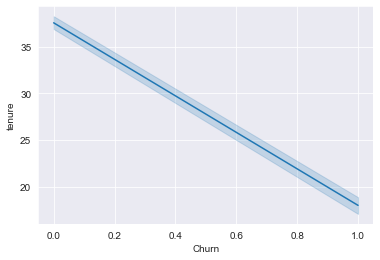

In [58]:
sns.lineplot(x='Churn', y='tenure', data=cdf)

In [59]:
pd.DataFrame(combined.var(), dtype='float64')

0
gender                                 2.500129e-01
SeniorCitizen                          1.358745e-01
Partner                                2.497476e-01
Dependents                             2.098649e-01
tenure                                 6.031681e+02
PhoneService                           8.746938e-02
PaperlessBilling                       2.415299e-01
MonthlyCharges                         9.054109e+02
TotalCharges                           2.144642e+07
Churn                                  1.949764e-01
MultipleLines_No phone service         8.746938e-02
MultipleLines_Yes                      2.439252e-01
InternetService_Fiber optic            2.463851e-01
InternetService_No                     1.697477e-01
OnlineSecurity_No internet service     1.697477e-01
OnlineSecurity_Yes                     2.045183e-01
OnlineBackup_No internet service       1.697477e-01
OnlineBackup_Yes                       2.259703e-01
DeviceProtection_No internet service   1.697477e-01
DeviceProtection_Yes                   2.256609e-01
TechSupport_No internet service        1.697477e-01
TechSupport_Yes                        2.060204e-01
StreamingTV_No internet service        1.697477e-01
StreamingTV_Yes                        2.366594e-01
StreamingMovies_No internet service    1.697477e-01
StreamingMovies_Yes                    2.374680e-01
Contract_One year                      1.654262e-01
Contract_Two year                      1.827710e-01
PaymentMethod_Credit card (automatic)  1.694255e-01
PaymentMethod_Electronic check         2.230682e-01
PaymentMethod_Mailed check             1.765189e-01
Kmeans                                 1.000968e+00

## Extracting only the customers who churned from the original dataset

In [60]:
churned = combined[combined['Churn']==1]
churned.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2        1              0        0           0       2             1   
4        0              0        0           0       2             1   
5        0              0        0           0       8             1   
8        0              0        1           0      28             1   
13       1              0        0           0      49             1   

    PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
2                  1           53.85        108.15      1  ...   
4                  1           70.70        151.65      1  ...   
5                  1           99.65        820.50      1  ...   
8                  1          104.80       3046.05      1  ...   
13                 1          103.70       5036.30      1  ...   

    StreamingTV_No internet service  StreamingTV_Yes  \
2                                 0                0   
4                                 0                0   
5                                 0                1   
8                                 0                1   
13                                0                1   

    StreamingMovies_No internet service  StreamingMovies_Yes  \
2                                     0                    0   
4                                     0                    0   
5                                     0                    1   
8                                     0                    1   
13                                    0                    1   

    Contract_One year  Contract_Two year  \
2                   0                  0   
4                   0                  0   
5                   0                  0   
8                   0                  0   
13                  0                  0   

    PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2                                       0                               0   
4                                       0                               1   
5                                       0                               1   
8                                       0                               1   
13                                      0                               0   

    PaymentMethod_Mailed check  Kmeans  
2                            1       2  
4                            0       2  
5                            0       2  
8                            0       0  
13                           0       0  

[5 rows x 32 columns]

In [61]:
pd.DataFrame(combined.corr()['Churn']).apply(lambda x: np.abs(x)).sort_values(by='Churn')

Churn
gender                                 0.008612
PhoneService                           0.011942
MultipleLines_No phone service         0.011942
MultipleLines_Yes                      0.040102
StreamingMovies_Yes                    0.061382
StreamingTV_Yes                        0.063228
DeviceProtection_Yes                   0.066160
TotalCharges                           0.076805
OnlineBackup_Yes                       0.082255
PaymentMethod_Mailed check             0.091683
PaymentMethod_Credit card (automatic)  0.134302
Partner                                0.150448
SeniorCitizen                          0.150889
Dependents                             0.164221
TechSupport_Yes                        0.164674
OnlineSecurity_Yes                     0.171226
Contract_One year                      0.177820
PaperlessBilling                       0.191825
MonthlyCharges                         0.193356
OnlineBackup_No internet service       0.227890
InternetService_No                     0.227890
DeviceProtection_No internet service   0.227890
TechSupport_No internet service        0.227890
StreamingTV_No internet service        0.227890
StreamingMovies_No internet service    0.227890
OnlineSecurity_No internet service     0.227890
Kmeans                                 0.251047
PaymentMethod_Electronic check         0.301919
Contract_Two year                      0.302253
InternetService_Fiber optic            0.308020
tenure                                 0.352229
Churn                                  1.000000

## Working on the 'Churned' Dataframe

In [62]:
# dropping features that had very mimimal correlation to the churn lable
drop = [
    'gender', 'Dependents', 'PhoneService', 'MultipleLines_No phone service', 'MultipleLines_Yes',
    'PaymentMethod_Mailed check', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
    'StreamingTV_Yes', 'StreamingMovies_Yes', 'TotalCharges'
]

combined.drop(labels=drop, axis=1, inplace=True)
churned.drop(labels=drop, axis=1, inplace=True)


C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
churned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
SeniorCitizen                            1869 non-null int64
Partner                                  1869 non-null int64
tenure                                   1869 non-null int64
PaperlessBilling                         1869 non-null int64
MonthlyCharges                           1869 non-null float64
Churn                                    1869 non-null int64
InternetService_Fiber optic              1869 non-null uint8
InternetService_No                       1869 non-null uint8
OnlineSecurity_No internet service       1869 non-null uint8
OnlineSecurity_Yes                       1869 non-null uint8
OnlineBackup_No internet service         1869 non-null uint8
DeviceProtection_No internet service     1869 non-null uint8
TechSupport_No internet service          1869 non-null uint8
TechSupport_Yes                          1869 non-null uint8
StreamingTV_No internet service      

SeniorCitizen                               AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Partner                                  AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
tenure                                   AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
PaperlessBilling                         AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
MonthlyCharges                           AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Churn                                    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
InternetService_Fiber optic              AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
InternetService_No                          AxesSubplot(0.125,0.593621;0.0945122x0.130172)
OnlineSecurity_No internet service       AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
OnlineSecurity_Yes                       AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
OnlineBackup_No internet service         AxesSubplot(0.465244,0.593621;0.0945122x0.130172)

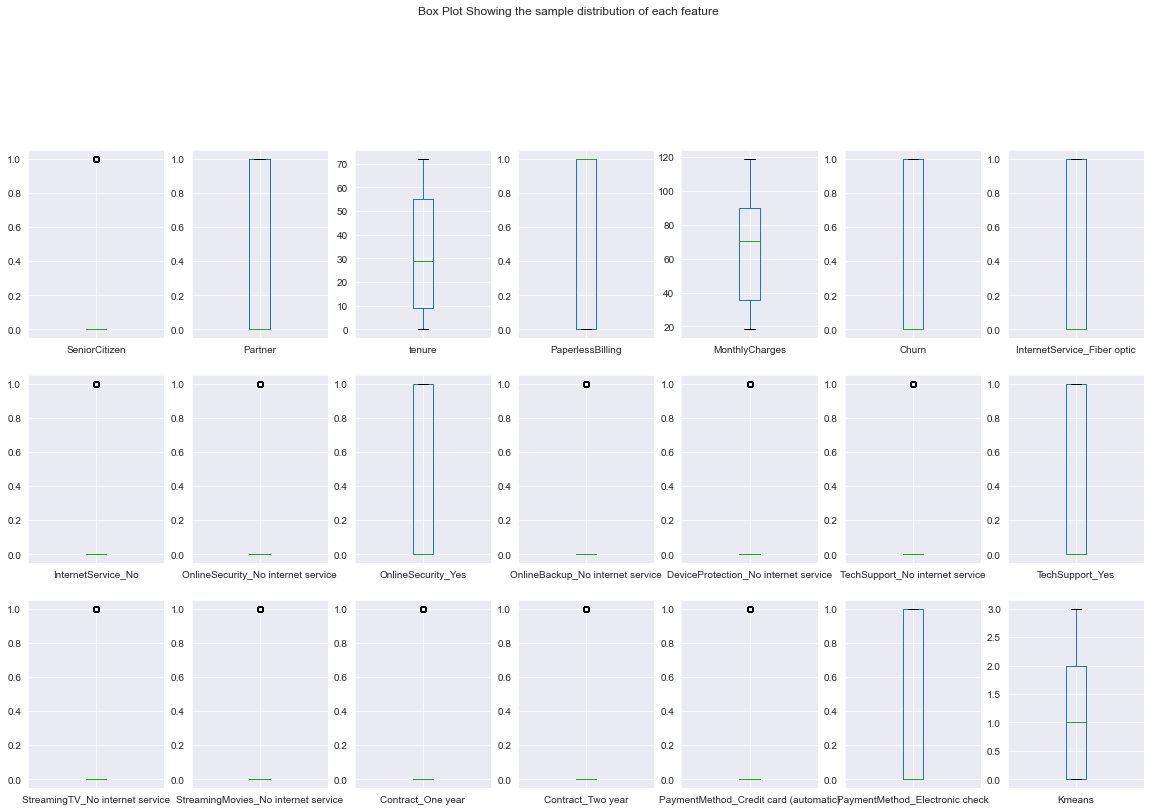

In [64]:
# first we need to normalize our values before carrying out a feature selection and extraction.
# this is to make it easier for our algorithm to get rid of the extra noisely feature we couldnt identify
# first we check for outliers using the box plot for each of the variables

combined.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False,
             title='Box Plot Showing the sample distribution of each feature', figsize=(20, 20))

In [65]:
from plotly.express import box

box(data_frame=churned['tenure'], title="Tenure")

In [66]:
box(data_frame=churned['MonthlyCharges'], title='MonthlyCharges')

In [67]:
churned[churned['tenure'] > 69]

SeniorCitizen  Partner  tenure  PaperlessBilling  MonthlyCharges  Churn  \
811               0        0      70                 1          104.00      1   
975               0        0      71                 1          108.05      1   
1306              0        0      70                 0          115.55      1   
2879              1        1      70                 1          102.95      1   
3040              0        1      71                 1          108.60      1   
3111              0        1      72                 1          103.40      1   
3439              1        1      72                 1          104.15      1   
3517              0        1      70                 1          109.50      1   
3890              0        1      72                 1          109.25      1   
4149              0        1      71                 0           49.35      1   
4513              1        1      72                 0           92.45      1   
4610              0        1      72                 1          117.80      1   
5441              0        1      70                 0           65.30      1   
5579              0        1      70                 0           93.90      1   
5697              0        1      70                 1          109.50      1   
5702              1        1      71                 1          105.10      1   
5841              1        0      70                 1           45.25      1   
6038              0        1      70                 1          114.20      1   
6290              0        1      71                 1           93.70      1   
6398              0        1      71                 1          106.00      1   
6424              0        1      72                 1           54.20      1   
6537              0        1      70                 0          115.65      1   
6945              0        1      70                 0           98.30      1   

      InternetService_Fiber optic  InternetService_No  \
811                             1                   0   
975                             1                   0   
1306                            1                   0   
2879                            1                   0   
3040                            1                   0   
3111                            1                   0   
3439                            1                   0   
3517                            1                   0   
3890                            1                   0   
4149                            0                   0   
4513                            0                   0   
4610                            1                   0   
5441                            0                   0   
5579                            1                   0   
5697                            1                   0   
5702                            1                   0   
5841                            0                   0   
6038                            1                   0   
6290                            1                   0   
6398                            1                   0   
6424                            0                   0   
6537                            1                   0   
6945                            1                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
811                                    0                   1  ...   
975                                    0                   1  ...   
1306                                   0                   1  ...   
2879                                   0                   0  ...   
3040                                   0                   0  ...   
3111                                   0                   0  ...   
3439                                   0                   0  ...   
3517                                   0                   1  ...   
3890                                   0                   0  ...   
41

In [68]:
# seeing as our total churned data is less than 1000 samples, droping these more rows would definetely affect the accuracy of the model
# so instead we would use the robust scaler algorithm as it takes outliers into consideration
# first we seperate our variables into X and y

a = combined.drop('Churn', axis=1).values
z = combined[combined['Churn']==1]
z = z.drop('Churn', axis=1).values

## Now for feature Selection

In [69]:
from sklearn.feature_selection import VarianceThreshold

print(X.shape, z.shape)

selector = VarianceThreshold(threshold=0.75*(1-0.75))
selector2 = VarianceThreshold(threshold=0.8*(1-0.8))

X = selector.fit_transform(X)
z = selector2.fit_transform(z)
print(X.shape, z.shape)


(7043, 31) (1869, 20)
(7043, 17) (1869, 8)


## normalizing both sets of input variables

In [70]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()

scaler1.fit(X)
scaler2.fit(z)

scaled_X = scaler1.transform(X)
scaled_z = scaler2.transform(z)

In [71]:
a = pd.DataFrame(scaled_z)
a.max()

0    1.710693
1    1.339299
2    2.766627
3    0.578792
4    1.780602
5    0.664092
6    0.863191
7    1.526147
dtype: float64

# Now to predict which customers churned voluntatily

## visualizing the churned customers data using PCA

In [72]:
scaled_z.max()

2.766626590543468

In [73]:
from sklearn.decomposition import PCA, TruncatedSVD

tsd = TruncatedSVD(n_components=2, algorithm="arpack")
tsd.fit(scaled_z)

z_tsd = tsd.transform(scaled_z)
z_tsd.shape

(1869, 2)

In [74]:
from plotly.express import scatter

scatter(x=z_tsd[:, 0], y=z_tsd[:, 1])

In [75]:
from sklearn.cluster import KMeans

classifier = KMeans(n_clusters=2, max_iter=500)

classifier.fit(z_tsd)

KMeans(max_iter=500, n_clusters=2)

In [76]:
classifier.cluster_centers_

array([[ 0.85952877, -0.31016974],
       [-1.90071053,  0.68589081]])

In [77]:
classifier.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [78]:
scatter(x=z_tsd[:, 0], y=z_tsd[:, 1], color = classifier.labels_)

In [79]:
kmeans = KMeans(n_clusters=2, max_iter=500)

kmeans.fit(z)

KMeans(max_iter=500, n_clusters=2)

In [80]:
correct = combined[combined['Churn']==1]

In [81]:
correct['value'] = kmeans.labels_

C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [82]:
correct.head()

SeniorCitizen  Partner  tenure  PaperlessBilling  MonthlyCharges  Churn  \
2               0        0       2                 1           53.85      1   
4               0        0       2                 1           70.70      1   
5               0        0       8                 1           99.65      1   
8               0        1      28                 1          104.80      1   
13              0        0      49                 1          103.70      1   

    InternetService_Fiber optic  InternetService_No  \
2                             0                   0   
4                             1                   0   
5                             1                   0   
8                             1                   0   
13                            1                   0   

    OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
2                                    0                   1  ...   
4                                    0                   0  ...   
5                                    0                   0  ...   
8                                    0                   0  ...   
13                                   0                   0  ...   

    TechSupport_No internet service  TechSupport_Yes  \
2                                 0                0   
4                                 0                0   
5                                 0                0   
8                                 0                1   
13                                0                0   

    StreamingTV_No internet service  StreamingMovies_No internet service  \
2                                 0                                    0   
4                                 0                                    0   
5                                 0                                    0   
8                                 0                                    0   
13                                0                                    0   

    Contract_One year  Contract_Two year  \
2                   0                  0   
4                   0                  0   
5                   0                  0   
8                   0                  0   
13                  0                  0   

    PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2                                       0                               0   
4                                       0                               1   
5                                       0                               1   
8                                       0                               1   
13                                      0                               0   

    Kmeans  value  
2        2      1  
4        2      0  
5        2      0  
8        0      0  
13       0      0  

[5 rows x 22 columns]

In [83]:
correct.corr()['value']

SeniorCitizen                           -0.150477
Partner                                 -0.119342
tenure                                  -0.254280
PaperlessBilling                        -0.248319
MonthlyCharges                          -0.856513
Churn                                         NaN
InternetService_Fiber optic             -0.903818
InternetService_No                       0.422637
OnlineSecurity_No internet service       0.422637
OnlineSecurity_Yes                      -0.023713
OnlineBackup_No internet service         0.422637
DeviceProtection_No internet service     0.422637
TechSupport_No internet service          0.422637
TechSupport_Yes                         -0.052494
StreamingTV_No internet service          0.422637
StreamingMovies_No internet service      0.422637
Contract_One year                       -0.072310
Contract_Two year                       -0.036125
PaymentMethod_Credit card (automatic)   -0.012667
PaymentMethod_Electronic check          -0.205065


In [84]:
#determine which catergory 0 or 1 falls under

correct[correct['SeniorCitizen']==1]['value'].value_counts()

0    404
1     72
Name: value, dtype: int64

In [85]:
correct[correct['InternetService_Fiber optic']==1]['value'].value_counts()

0    1297
Name: value, dtype: int64

In [86]:
correct['value'] = correct['value'].apply(lambda x: 'Involuntarily'
                                          if x == 0 else "Voluntarily")

C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [87]:
correct.head()

SeniorCitizen  Partner  tenure  PaperlessBilling  MonthlyCharges  Churn  \
2               0        0       2                 1           53.85      1   
4               0        0       2                 1           70.70      1   
5               0        0       8                 1           99.65      1   
8               0        1      28                 1          104.80      1   
13              0        0      49                 1          103.70      1   

    InternetService_Fiber optic  InternetService_No  \
2                             0                   0   
4                             1                   0   
5                             1                   0   
8                             1                   0   
13                            1                   0   

    OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
2                                    0                   1  ...   
4                                    0                   0  ...   
5                                    0                   0  ...   
8                                    0                   0  ...   
13                                   0                   0  ...   

    TechSupport_No internet service  TechSupport_Yes  \
2                                 0                0   
4                                 0                0   
5                                 0                0   
8                                 0                1   
13                                0                0   

    StreamingTV_No internet service  StreamingMovies_No internet service  \
2                                 0                                    0   
4                                 0                                    0   
5                                 0                                    0   
8                                 0                                    0   
13                                0                                    0   

    Contract_One year  Contract_Two year  \
2                   0                  0   
4                   0                  0   
5                   0                  0   
8                   0                  0   
13                  0                  0   

    PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2                                       0                               0   
4                                       0                               1   
5                                       0                               1   
8                                       0                               1   
13                                      0                               0   

    Kmeans          value  
2        2    Voluntarily  
4        2  Involuntarily  
5        2  Involuntarily  
8        0  Involuntarily  
13       0  Involuntarily  

[5 rows x 22 columns]

In [88]:
correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 22 columns):
SeniorCitizen                            1869 non-null int64
Partner                                  1869 non-null int64
tenure                                   1869 non-null int64
PaperlessBilling                         1869 non-null int64
MonthlyCharges                           1869 non-null float64
Churn                                    1869 non-null int64
InternetService_Fiber optic              1869 non-null uint8
InternetService_No                       1869 non-null uint8
OnlineSecurity_No internet service       1869 non-null uint8
OnlineSecurity_Yes                       1869 non-null uint8
OnlineBackup_No internet service         1869 non-null uint8
DeviceProtection_No internet service     1869 non-null uint8
TechSupport_No internet service          1869 non-null uint8
TechSupport_Yes                          1869 non-null uint8
StreamingTV_No internet service      

In [89]:
correct['value'].value_counts()

Involuntarily    1374
Voluntarily       495
Name: value, dtype: int64

In [90]:
correct[correct['tenure']>= 69]['value'].value_counts()

Involuntarily    29
Voluntarily       2
Name: value, dtype: int64

In [91]:
correct[correct['MonthlyCharges']<=40]['value'].value_counts()

Voluntarily    214
Name: value, dtype: int64

# Here we have successfully separated the people who churn voluntarily as well as involuntarily in the correct dataframe

### Here are the 2 main indicators of whether or not a customer churned voluntarily is:
- If they have low monthly charges( then they left voluntarily or 0)
- If they have a fiber optic internet connection(then they left involuntarily or 1)

# Now to answer the second question and build the predictive model using 10 fold cross-validation

## Split the data

In [92]:
X = cdf.drop('Churn', axis=1).copy()
y = cdf['Churn'].copy()

X = StandardScaler().fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Linear Discriminant Analysis (LDA)

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(tol=0.29635)
lda.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(lda, scaled_X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

Mean ROC Area Under Curve (AUC): 0.8344717754138069


Best Threshold is 0.23289621800557003 and the best G-Mean is 0.7594505206984418


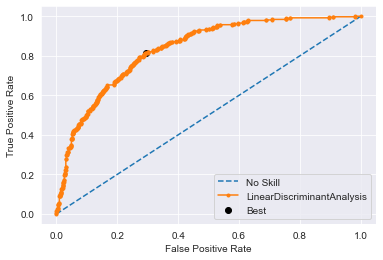

In [77]:
# predicting probabilities
lda_pp = lda.predict_proba(X_test)

# Retrieving only the probabilities of the minority class (1)
lda_pp = lda_pp[:, 1]

# cacluating scores
fpr, tpr, thresholds = roc_curve(y_test, lda_pp)

# calculating the g-mean
gmeans = np.sqrt(tpr * (1-fpr))

# finding the index of the largest gmean
l_gmean = np.argmax(gmeans)
print(f"Best Threshold is {thresholds[l_gmean]} and the best G-Mean is {gmeans[l_gmean]}")

plt.plot([0,1], [0,1], linestyle='--', label = 'No Skill')
plt.plot(fpr, tpr, marker='.', label='LinearDiscriminantAnalysis')
plt.scatter(fpr[l_gmean], tpr[l_gmean], marker='o', color='Black', label="Best")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

In [78]:
predict = lda.predict(X_test)
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

[[905 130]
 [167 207]]


Text(0.5, 1.0, 'Confusion Metrics')

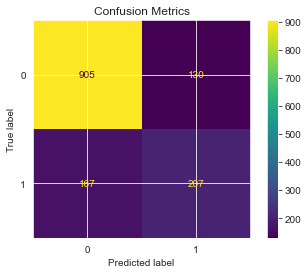

In [79]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, roc_curve

check = plot_confusion_matrix(estimator=lda, X= X_test, y_true=y_test, display_labels = [0,1])
check.ax_.set_title('Confusion Metrics')

[0.42379603 0.42290249 0.42314237 ... 0.0106383  0.00533333 0.        ]
Best Threshold is 0.251897333977325 and the best F_score is 0.6219895287958115


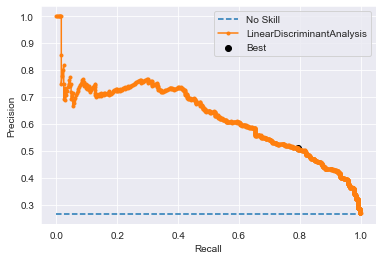

In [80]:
# plotting a precision-recall curve

precision, recall, thresholds = precision_recall_curve(y_test, lda_pp)

# conver to f1 score
fscores = (2 * precision * recall) / (precision + recall)
fscores = np.nan_to_num(fscores)

# locating the largest index
lgindex = np.argmax(fscores, )
print(fscores)
print(f"Best Threshold is {thresholds[lgindex]} and the best F_score is {fscores[lgindex]}")

# plotting the roc curve for the model
ns = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [ns,ns], linestyle='--', label = 'No Skill')
plt.plot(recall, precision, marker='.', label='LinearDiscriminantAnalysis')
plt.scatter(recall[lgindex], precision[lgindex], marker='o', color='Black', label="Best")

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

Text(0.5, 1.0, 'Precision-Recall Curve')

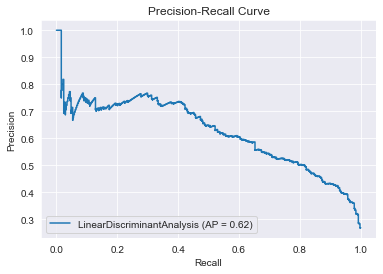

In [81]:
from sklearn.metrics import plot_precision_recall_curve

skplot  = plot_precision_recall_curve(lda, X= X_test, y=y_test, response_method='predict_proba')
skplot.ax_.set_title('Precision-Recall Curve')


## Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=350, n_jobs=-1, random_state=17, class_weight='balanced_subsample')
model.fit(X_train, y_train)

predictrand = model.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(model, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

Mean ROC Area Under Curve (AUC): 0.8169124015471081


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

[[928 107]
 [193 181]]


Text(0.5, 1.0, 'Confusion Metrics')

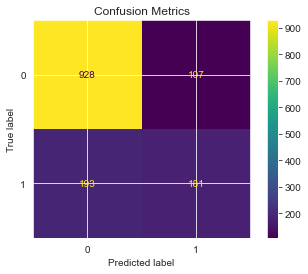

In [83]:
print(classification_report(y_test, predictrand))
print(confusion_matrix(y_test, predictrand))
rand = plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, display_labels = [0,1])
rand.ax_.set_title('Confusion Metrics')

## XGBOOST Classifier

In [198]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1, random_state=21)

xgb.fit(X_train, y_train)

xpredict = xgb.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(xgb, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

Mean ROC Area Under Curve (AUC): 0.8416828059138921


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

[[934 101]
 [183 191]]


Text(0.5, 1.0, 'Confusion Metrics')

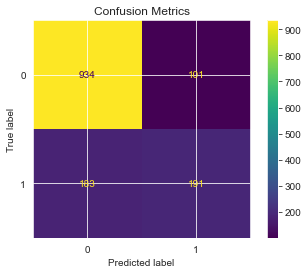

In [199]:
print(classification_report(y_test, xpredict))
print(confusion_matrix(y_test, xpredict))
rand = plot_confusion_matrix(estimator=xgb, X= X_test, y_true=y_test, display_labels = [0,1])
rand.ax_.set_title('Confusion Metrics')

## K Nearest Neighbours

In [86]:
from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

kmodel.fit(X_train, y_train)

kpred =kmodel.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(kmodel, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

Mean ROC Area Under Curve (AUC): 0.6465914145412713


              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1035
           1       0.47      0.49      0.48       374

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409



Text(0.5, 1.0, 'Confusion Metrics')

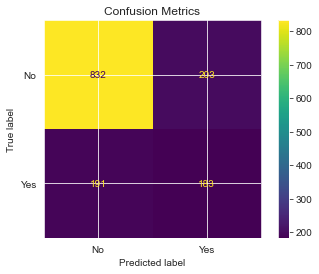

In [87]:
print(classification_report(y_test, kpred))
rand = plot_confusion_matrix(estimator=kmodel, X= X_test, y_true=y_test, display_labels = ['No', 'Yes'])
rand.ax_.set_title('Confusion Metrics')

### Elbow Method to choose correct K value

In [88]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error rate')

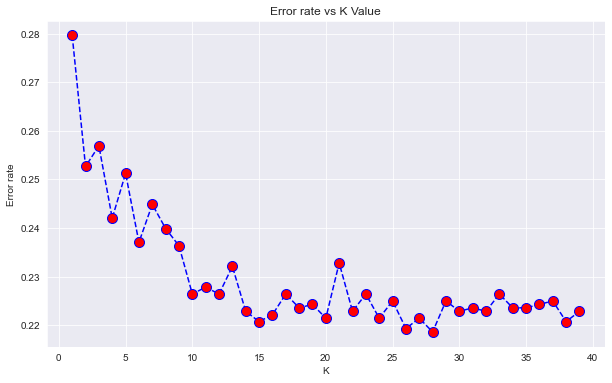

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40),
         error_rate,
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title("Error rate vs K Value")
plt.xlabel('K')
plt.ylabel('Error rate')

In [90]:
from plotly.express import line

line(x=range(1, 40),
     y=error_rate)

Mean ROC Area Under Curve (AUC): 0.8178231078032057
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

[[894 141]
 [167 207]]


Text(0.5, 1.0, 'Confusion Metrics')

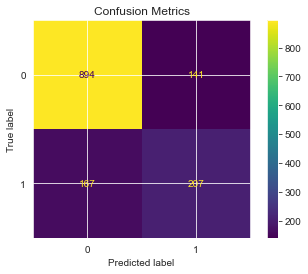

In [97]:
# the best k value is 25

knn = KNeighborsClassifier(n_neighbors=28, n_jobs=-1)
knn.fit(X_train, y_train)
kpredict = knn.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(knn, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

print(classification_report(y_test, kpredict))
print(confusion_matrix(y_test, kpredict))
rand = plot_confusion_matrix(estimator=knn,
                             X=X_test,
                             y_true=y_test,
                             display_labels=[0, 1])
rand.ax_.set_title('Confusion Metrics')

## Support Vector Machine - SVC

Mean ROC Area Under Curve (AUC): 0.7957230704043987
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[929 106]
 [187 187]]


Text(0.5, 1.0, 'Confusion Metrics')

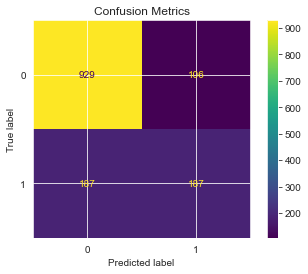

In [95]:
from sklearn.svm import SVC

svc = SVC(random_state=21)
svc.fit(X_train, y_train)
xpredict = svc.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(svc, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

print(classification_report(y_test, xpredict))
print(confusion_matrix(y_test, xpredict))
rand = plot_confusion_matrix(estimator=svc,
                             X=X_test,
                             y_true=y_test,
                             display_labels=[0, 1])
rand.ax_.set_title('Confusion Metrics')

## Logistic Regression

Mean ROC Area Under Curve (AUC): 0.8369274722249849
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

[[926 109]
 [162 212]]


Text(0.5, 1.0, 'Confusion Metrics')

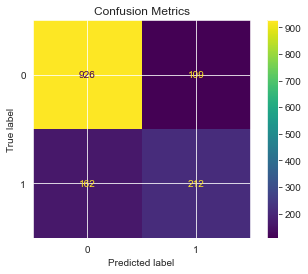

In [197]:
from sklearn.linear_model import LogisticRegression

logt = LogisticRegression(n_jobs=-1, random_state=21)
logt.fit(X_train, y_train)
lpredict = logt.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(logt, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

print(classification_report(y_test, lpredict))
print(confusion_matrix(y_test, lpredict))
rand = plot_confusion_matrix(estimator=logt,
                             X=X_test,
                             y_true=y_test,
                             display_labels=[0, 1])
rand.ax_.set_title('Confusion Metrics')

## BalancedRandomForestClassifier

Mean ROC Area Under Curve (AUC): 0.8259828533491269
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

[[761 274]
 [ 78 296]]


Text(0.5, 1.0, 'Confusion Metrics')

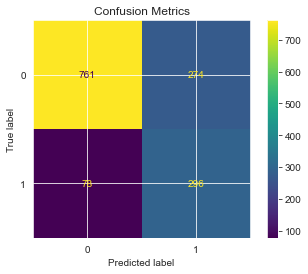

In [99]:
from imblearn.ensemble import BalancedRandomForestClassifier

br = BalancedRandomForestClassifier(n_jobs=-1, random_state=21)

br.fit(X_train, y_train)
brpredict = br.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(br, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

print(classification_report(y_test, brpredict))
print(confusion_matrix(y_test, brpredict))
rand = plot_confusion_matrix(estimator=br,
                             X=X_test,
                             y_true=y_test,
                             display_labels=[0, 1])
rand.ax_.set_title('Confusion Metrics')

## Our two best performing models are the XGBoost and  logistic regression models

# SMOTE UNDERSAMPLING

In [117]:
from imblearn.under_sampling import RandomUnderSampler

os = RandomUnderSampler(random_state=21)
print(X_train.shape, y_train.shape)
X_train_n, y_train_n = os.fit_sample(X_train, y_train)

(5634, 31) (5634,)


In [118]:
print(X_train_n.shape, y_train_n.shape)

(2990, 31) (2990,)


Mean ROC Area Under Curve (AUC): 0.8416828059138921

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.81      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.74      0.76      1409

[[744 291]
 [ 71 303]]


Text(0.5, 1.0, 'Confusion Metrics')

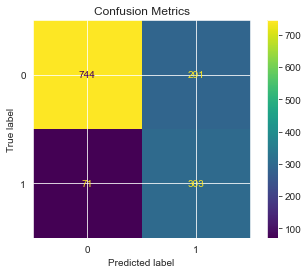

In [121]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1, random_state=21)

xgb.fit(X_train_n, y_train_n)

xpredict = xgb.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(xgb, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

print('')

print(classification_report(y_test, xpredict))
print(confusion_matrix(y_test, xpredict))
rand = plot_confusion_matrix(estimator=xgb, X= X_test, y_true=y_test, display_labels = [0,1])
rand.ax_.set_title('Confusion Metrics')

# Recursive Feature Elimination

In [124]:
from sklearn.feature_selection import RFECV

logt = RFECV(LogisticRegression(n_jobs=-1, random_state=21), scoring='roc_auc')

Mean ROC Area Under Curve (AUC): 0.8365992404024731
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[921 114]
 [168 206]]


Text(0.5, 1.0, 'Confusion Metrics')

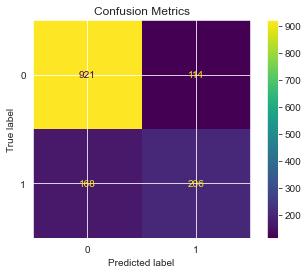

In [125]:
logt.fit(X_train, y_train)
lpredict = logt.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)
scores = cross_val_score(logt, scaled_X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'Mean ROC Area Under Curve (AUC): {np.mean(scores)}')

print(classification_report(y_test, lpredict))
print(confusion_matrix(y_test, lpredict))
rand = plot_confusion_matrix(estimator=logt,
                             X=X_test,
                             y_true=y_test,
                             display_labels=[0, 1])
rand.ax_.set_title('Confusion Metrics')